#### imports

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

2024-04-29 09:23:30.309142: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-29 09:23:30.310309: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-29 09:23:30.360280: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-29 09:23:30.556162: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-29 09:23:31.242626: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

#### carregando o dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

#### criando, compilando e treinando o modelo

In [3]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=7, validation_split=0.2)

Epoch 1/7


/home/cristoffer_pogan/Documents/dev/Tutorials/Alura/Formacao_Machine_Learning_Avancada/Deep_Learning_parte_2_Keras/.venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-04-29 09:23:33.048747: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6259 - loss: 11.8409 - val_accuracy: 0.7018 - val_loss: 0.7668
Epoch 2/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6862 - loss: 0.8047 - val_accuracy: 0.7528 - val_loss: 0.6522
Epoch 3/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6976 - loss: 0.7908 - val_accuracy: 0.7811 - val_loss: 0.5923
Epoch 4/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7115 - loss: 0.7551 - val_accuracy: 0.7681 - val_loss: 0.6220
Epoch 5/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7247 - loss: 0.7345 - val_accuracy: 0.8123 - val_loss: 0.5690
Epoch 6/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7305 - loss: 0.7359 - val_accuracy: 0.7897 - val_loss: 0.5757
Epoch 7/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7250 - loss: 0.7324 - val_accuracy: 0.7837 - val_loss: 0.6231


#### avaliando acurácia e perda por época

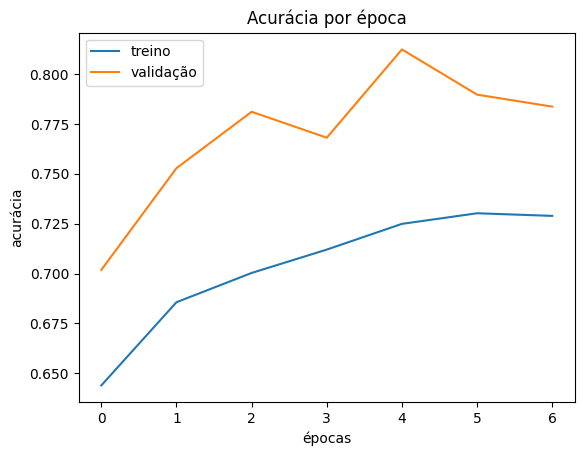

In [4]:
def plot_accuracy() -> None:
    plt.plot(historico.history['accuracy'])
    plt.plot(historico.history['val_accuracy'])
    plt.title('Acurácia por época')
    plt.xlabel('épocas')
    plt.ylabel('acurácia')
    plt.legend(['treino', 'validação'])

plot_accuracy()


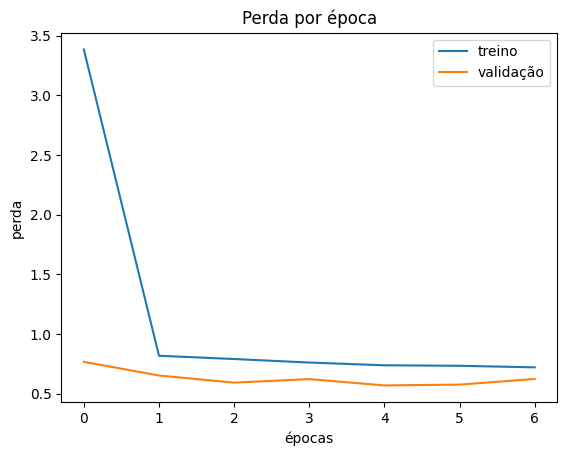

In [5]:
def plot_loss() -> None:
    plt.plot(historico.history['loss'])
    plt.plot(historico.history['val_loss'])
    plt.title('Perda por época')
    plt.xlabel('épocas')
    plt.ylabel('perda')
    plt.legend(['treino', 'validação'])

plot_loss()

### sumário do modelo

In [7]:
sumario_do_modelo = modelo.summary()
sumario_do_modelo

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 610,592 (2.33 MB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 407,062 (1.55 MB)

### pesos da primeira camada dense

In [22]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### vieses da primeira camada dense

In [23]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense

array([-1.92193054e-02,  4.35875868e-03, -2.09302753e-02, -2.26778705e-02,
       -4.91479551e-03, -2.82071307e-02,  2.75880750e-02,  1.88003749e-01,
       -2.16505658e-02, -2.97971885e-03, -9.80049185e-03, -2.45450120e-02,
       -9.32260696e-03, -2.14476231e-02, -6.96755433e-03,  1.50217533e-01,
       -1.47221852e-02, -3.58860791e-02, -2.40459703e-02, -3.70453857e-02,
        8.01742543e-03, -2.14634277e-02,  1.75132994e-02, -3.95708829e-02,
       -1.62377805e-02, -1.24550648e-02, -4.50397702e-03, -2.12204438e-02,
       -3.30760360e-01, -5.11908112e-03, -3.93720455e-02, -2.70796977e-02,
       -1.99521296e-02, -2.72372998e-02, -3.51969935e-02, -2.28016581e-02,
       -2.09907610e-02, -2.33253315e-02, -1.61487255e-02, -4.95069660e-02,
       -1.06035974e-02, -1.97164230e-02, -1.59058906e-02, -3.40443524e-03,
        3.85042615e-02, -4.61307615e-02, -2.24439823e-03,  1.73291136e-02,
       -2.65638418e-02, -3.65138501e-02, -1.53516103e-02, -3.10659371e-02,
       -1.29402457e-02, -

### definindo pesos zerados

In [25]:
pesos_camada_dense.shape
pesos_camada_dense_zerados = np.zeros((784, 256))
modelo.layers[1].set_weights(
    [pesos_camada_dense_zerados, vieses_camada_dense]
)

modelo.layers[1].get_weights()

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([-1.92193054e-02,  4.35875868e-03, -2.09302753e-02, -2.26778705e-02,
        -4.91479551e-03, -2.82071307e-02,  2.75880750e-02,  1.88003749e-01,
        -2.16505658e-02, -2.97971885e-03, -9.80049185e-03, -2.45450120e-02,
        -9.32260696e-03, -2.14476231e-02, -6.96755433e-03,  1.50217533e-01,
        -1.47221852e-02, -3.58860791e-02, -2.40459703e-02, -3.70453857e-02,
         8.01742543e-03, -2.14634277e-02,  1.75132994e-02, -3.95708829e-02,
        -1.62377805e-02, -1.24550648e-02, -4.50397702e-03, -2.12204438e-02,
        -3.30760360e-01, -5.11908112e-03, -3.93720455e-02, -2.70796977e-02,
        -1.99521296e-02, -2.72372998e-02, -3.51969935e-02, -2.28016581e-02,
        -2.09907610e-02, -2.33253315e-02, -1.6148725

In [26]:
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=7, validation_split=0.2)

Epoch 1/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5315 - loss: 1.6496 - val_accuracy: 0.7443 - val_loss: 0.6846
Epoch 2/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6366 - loss: 0.8986 - val_accuracy: 0.7401 - val_loss: 0.6430
Epoch 3/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6548 - loss: 0.8721 - val_accuracy: 0.7697 - val_loss: 0.6638
Epoch 4/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6631 - loss: 0.8654 - val_accuracy: 0.7434 - val_loss: 0.6661
Epoch 5/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6585 - loss: 0.8582 - val_accuracy: 0.7333 - val_loss: 0.6752
Epoch 6/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6665 - loss: 0.8456 - val_accuracy: 0.7540 - val_loss: 0.6253
Epoch 7/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6714 - loss: 0.8516 - val_accuracy: 0.7483 - val_loss: 0.6552


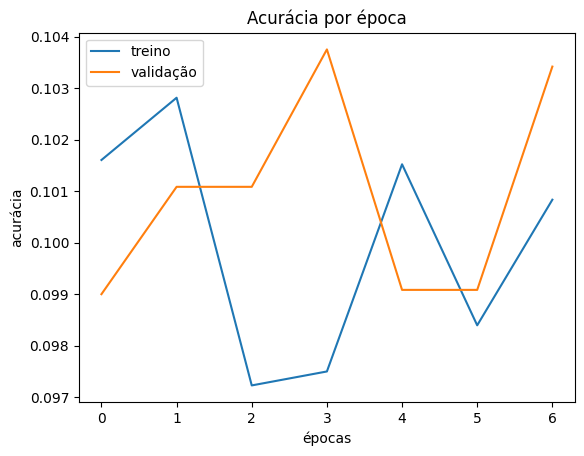

In [51]:
plot_accuracy()

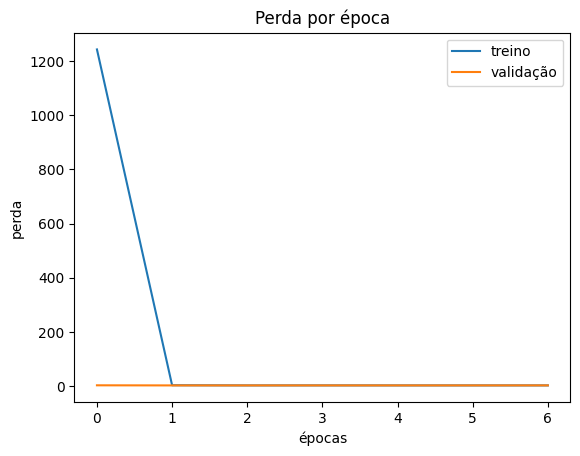

In [52]:
plot_loss()

### definindo pesos aleatórios

In [31]:
pesos_camada_dense.shape
pesos_camada_dense_aleatorios = np.random.rand(784, 256)
modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense]
)

modelo.layers[1].get_weights()

[array([[0.12376974, 0.8144601 , 0.5161133 , ..., 0.5641301 , 0.04953593,
         0.41995656],
        [0.8428979 , 0.92194366, 0.17135397, ..., 0.6680767 , 0.47837445,
         0.24387386],
        [0.01908723, 0.6598419 , 0.34894824, ..., 0.33847943, 0.57718676,
         0.5434476 ],
        ...,
        [0.9813974 , 0.4769962 , 0.84258115, ..., 0.03399673, 0.43676582,
         0.45774895],
        [0.75556284, 0.95651335, 0.9852547 , ..., 0.0946997 , 0.71277076,
         0.28785467],
        [0.9407341 , 0.5001226 , 0.96958655, ..., 0.3897752 , 0.3801308 ,
         0.5084555 ]], dtype=float32),
 array([-1.92193054e-02,  4.35875868e-03, -2.09302753e-02, -2.26778705e-02,
        -4.91479551e-03, -2.82071307e-02,  2.75880750e-02,  1.88003749e-01,
        -2.16505658e-02, -2.97971885e-03, -9.80049185e-03, -2.45450120e-02,
        -9.32260696e-03, -2.14476231e-02, -6.96755433e-03,  1.50217533e-01,
        -1.47221852e-02, -3.58860791e-02, -2.40459703e-02, -3.70453857e-02,
         8.017

In [32]:
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=7, validation_split=0.2)

Epoch 1/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2887 - loss: 19583.5938 - val_accuracy: 0.6949 - val_loss: 1608.3467
Epoch 2/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5930 - loss: 3156.8066 - val_accuracy: 0.7190 - val_loss: 1014.7589
Epoch 3/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6311 - loss: 1282.0117 - val_accuracy: 0.6455 - val_loss: 715.1597
Epoch 4/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6698 - loss: 676.3055 - val_accuracy: 0.7498 - val_loss: 380.1731
Epoch 5/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7072 - loss: 358.8329 - val_accuracy: 0.7322 - val_loss: 156.3067
Epoch 6/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7437 - loss: 158.5296 - val_accuracy: 0.7761 - val_loss: 52.1083
Epoch 7/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7606 - loss: 43.8733 - val_accuracy: 0.8085 - val_loss: 19.9818


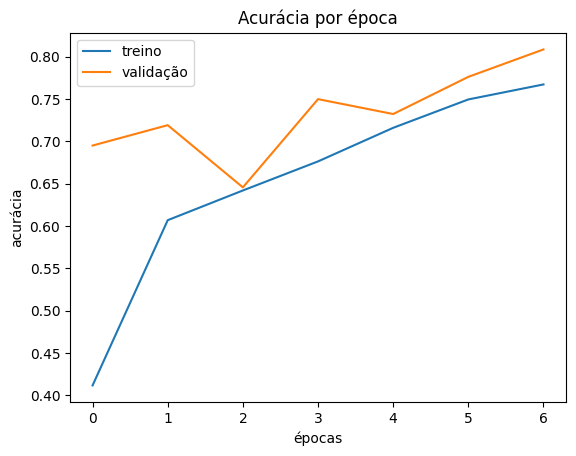

In [33]:
plot_accuracy()

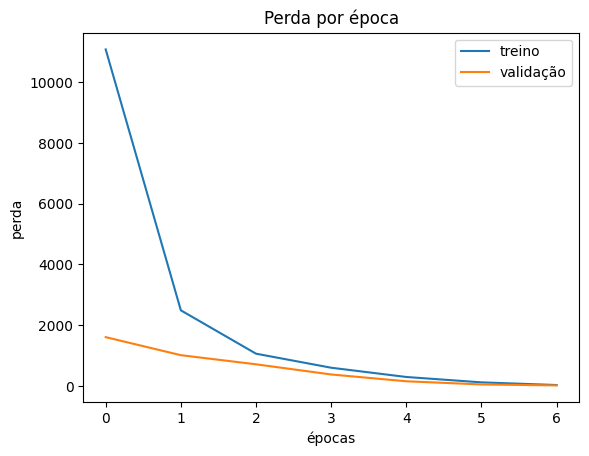

In [34]:
plot_loss()

### configuração do modelo

In [36]:
modelo.get_config()

{'name': 'sequential',
 'trainable': True,
 'dtype': 'float32',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'dtype': 'float32',
    'data_format': 'channels_last'},
   'registered_name': None,
   'build_config': {'input_shape': (None, 28, 28)}},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
    

### definindo pesos e vieses zerados

In [37]:
vieses_camada_dense_zerados = np.zeros((256,))

In [38]:
pesos_camada_dense.shape
pesos_camada_dense_zerados = np.zeros((784, 256))
modelo.layers[1].set_weights(
    [pesos_camada_dense_zerados, vieses_camada_dense_zerados]
)

In [39]:
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=7, validation_split=0.2)

Epoch 1/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1038 - loss: 2.9620 - val_accuracy: 0.0957 - val_loss: 2.5137
Epoch 2/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1008 - loss: 2.4472 - val_accuracy: 0.0957 - val_loss: 2.3291
Epoch 3/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0999 - loss: 2.3158 - val_accuracy: 0.0957 - val_loss: 2.3037
Epoch 4/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0990 - loss: 2.3030 - val_accuracy: 0.0957 - val_loss: 2.3027
Epoch 5/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0994 - loss: 2.3027 - val_accuracy: 0.0983 - val_loss: 2.3027
Epoch 6/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0998 - loss: 2.3027 - val_accuracy: 0.0957 - val_loss: 2.3027
Epoch 7/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0949 - loss: 2.3027 - val_accuracy: 0.0995 - val_loss: 2.3028


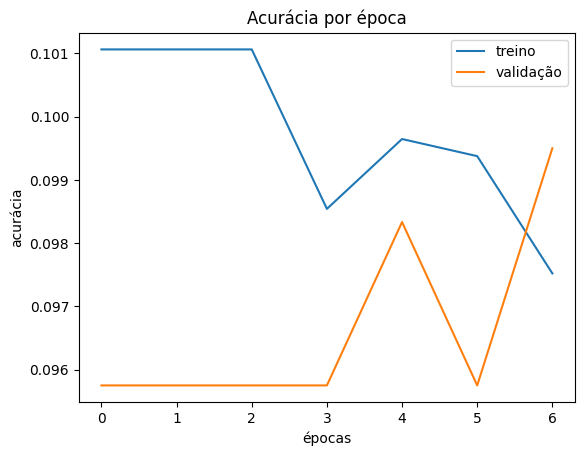

In [40]:
plot_accuracy()

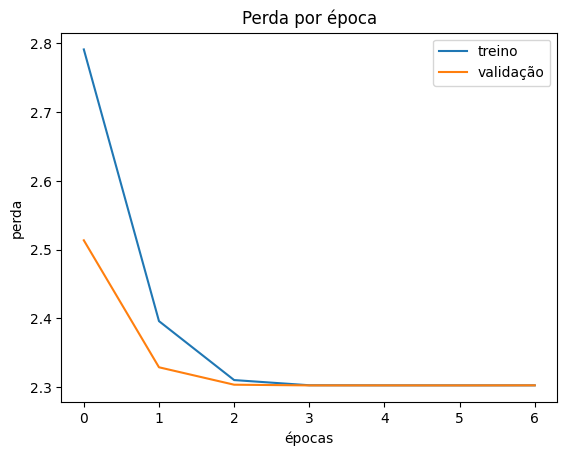

In [41]:
plot_loss()

### definindo pesos aleatórios e vieses zerados

In [42]:
pesos_camada_dense_aleatorios = np.random.rand(784, 256)
modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense_zerados]
)

In [43]:
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=7, validation_split=0.2)

Epoch 1/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2633 - loss: 4004.0593 - val_accuracy: 0.6008 - val_loss: 509.0946
Epoch 2/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5333 - loss: 873.5898 - val_accuracy: 0.6831 - val_loss: 369.6498
Epoch 3/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6402 - loss: 536.2617 - val_accuracy: 0.7287 - val_loss: 274.6429
Epoch 4/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7010 - loss: 251.3581 - val_accuracy: 0.6750 - val_loss: 185.1084
Epoch 5/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7371 - loss: 105.6474 - val_accuracy: 0.7634 - val_loss: 39.9255
Epoch 6/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7589 - loss: 33.3806 - val_accuracy: 0.7908 - val_loss: 13.9571
Epoch 7/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7444 - loss: 7.9176 - val_accuracy: 0.7287 - val_loss: 5.4954


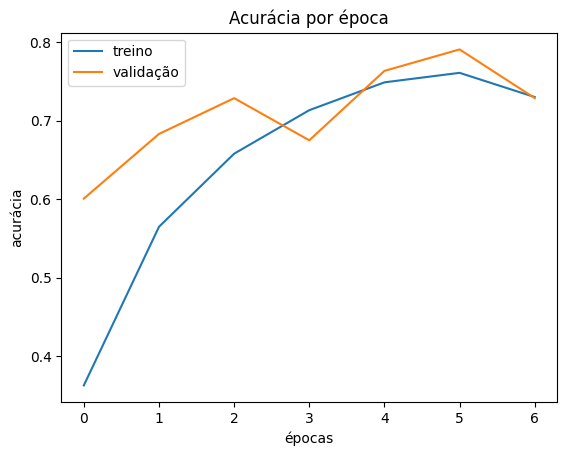

In [44]:
plot_accuracy()

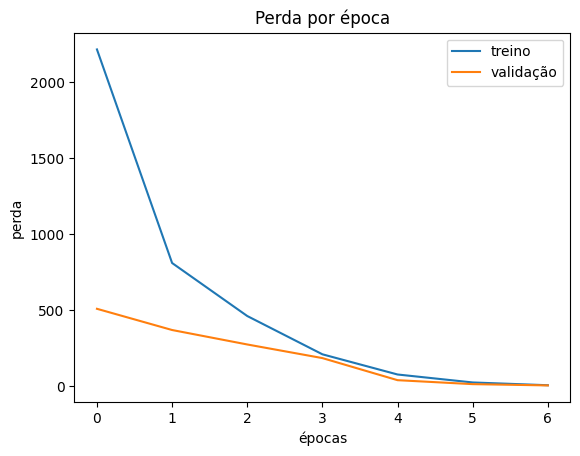

In [45]:
plot_loss()

### salvando e carregando o modelo

In [35]:
modelo.save('modelo.keras')
modelo_salvo = load_model('modelo.keras')

### Dense

saída = ReLU(multiplica(entrada + peso) + viés)

output = activation(dot(input, kernel) + bias)

((i * w) + b)

### Para Saber Mais

Como podemos ver na configuração inicial da camada Dense na documentação Keras,

```python
keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
```

o inicializador de kernel ou matriz de pesos é chamado de **glorot uniforme** e os vieses são inicializados como 0.

Glorot, pois é o sobrenome de Xavier Glorot que escreveu o artigo que define esse inicializador. Ele também é conhecido como **inicializador uniforme de Xavier**.

E o que esse inicializador faz? Bom, ele pega nossos dados de treino e define possíveis valores para os pesos, como abaixo:

```python
pesos = [1, 2, 3, 4, 5]
```

A cada propagação da rede esses valores alteram, sendo que a probabilidade de cada um deles acontecer permanece 1/5.

Fazer com que essa probabilidade permaneça igual para cada um dos números é algo chamado de **distribuição uniforme**.

Então, o algoritmo pega essas amostras de uma distribuição uniforme, define valores, mas quais valores? De 1 até 1.000? De 0 até 5? Qual o limite?

Para saber isso, o algoritmo resolve a seguinte conta:

```python
sqrt(5 / (unidades_de_entrada_do_kernel + unidades_de_saída_do_kernel))
```

$$ \sqrt{5 / (inputs + outputs)} $$

Repare que ele pega tudo que entra para ser calculado, junta com tudo o que vai sair, que são nossas unidades de entrada e saída da camada, divide por 5 e pega a raiz quadrada desse número.

E porque isso é importante? Porque desse modo os pesos ficam dentro de uma faixa de valores, o que garante que eles fiquem "na medida", nem muito pequenos a ponto de sumirem e nem muito grandes a ponto de explodirem.

Link do artigo (ou paper): [Understanding the difficulty of training deep feedforward neural networks](https://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf)

### Como chegar no mínimo global?

Otimizadores:

Gradiente descendente ou Gradiente descendente aleatório = Gradiente descendente estocástico

GD = Gradient Descent

SGD = Stochastic Gradient Descent

Adam = Adaptive moment estimation

## Testando os hiperparâmetros da rede

In [77]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

adam = keras.optimizers.Adam(learning_rate=0.002)

callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss'),
             keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.keras',
                                             monitor='val_loss',
                                             save_best_only=True)]

modelo.compile(optimizer=adam,
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino,
                       identificacoes_treino,
                       batch_size=480,
                       epochs=7,
                       validation_split=0.2,
                       callbacks=callbacks)

Epoch 1/7
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5355 - loss: 70.6261 - val_accuracy: 0.6557 - val_loss: 1.0556
Epoch 2/7
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6419 - loss: 1.1402 - val_accuracy: 0.7136 - val_loss: 0.8256
Epoch 3/7
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6895 - loss: 0.9141 - val_accuracy: 0.7362 - val_loss: 0.7564
Epoch 4/7
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7031 - loss: 0.8264 - val_accuracy: 0.7458 - val_loss: 0.7280
Epoch 5/7
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7210 - loss: 0.7586 - val_accuracy: 0.7644 - val_loss: 0.6889
Epoch 6/7
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7365 - loss: 0.7143 - val_accuracy: 0.7759 - val_loss: 0.6482
Epoch 7/7
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7374 - loss: 0.6899 - val_accuracy: 0.7809 - val_loss: 0.6211


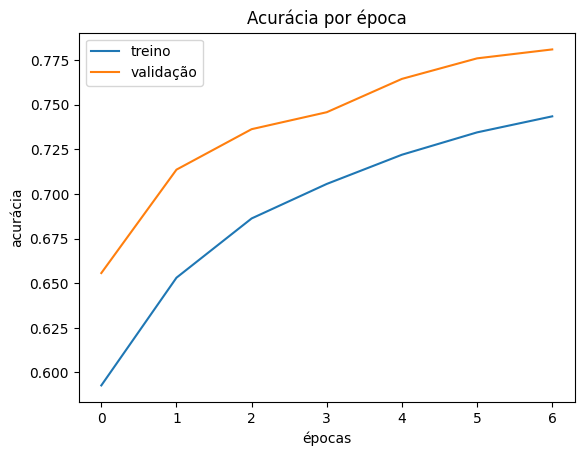

In [78]:
plot_accuracy()

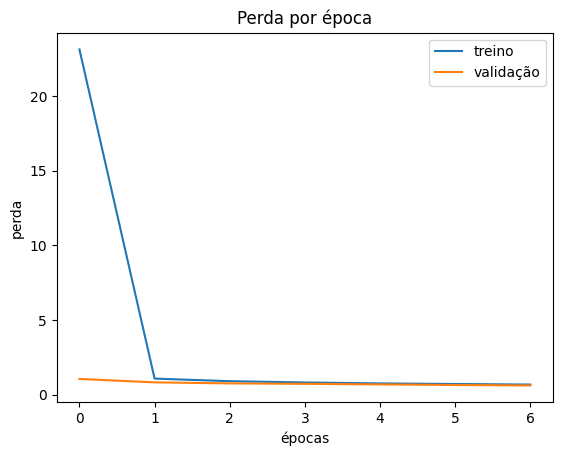

In [79]:
plot_loss()